<a href="https://colab.research.google.com/github/Nikhilpundir777/eye-Disease-/blob/main/eyeDiseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
!wget https://www.dropbox.com/scl/fo/6iu9hapdpq1abhtylfq4i/h?rlkey=dsvk64ij2i8crp46onbsu110s&dl=0

--2024-01-22 02:49:03--  https://www.dropbox.com/scl/fo/6iu9hapdpq1abhtylfq4i/h?rlkey=dsvk64ij2i8crp46onbsu110s
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc207ad65ab132468cfa360833f9.dl.dropboxusercontent.com/zip_download_get/BvOrTnlJTFkGo2cwPKKBKIfyUcL0FZUoM7f63r_Z4LL3tX24RTa96kHk3bK0BHfVVeICKPQWMBaD1-X4qjiJ_xz5Sdhw9a6qf60Aq9Tst60wHQ# [following]
--2024-01-22 02:49:05--  https://uc207ad65ab132468cfa360833f9.dl.dropboxusercontent.com/zip_download_get/BvOrTnlJTFkGo2cwPKKBKIfyUcL0FZUoM7f63r_Z4LL3tX24RTa96kHk3bK0BHfVVeICKPQWMBaD1-X4qjiJ_xz5Sdhw9a6qf60Aq9Tst60wHQ
Resolving uc207ad65ab132468cfa360833f9.dl.dropboxusercontent.com (uc207ad65ab132468cfa360833f9.dl.dropboxusercontent.com)... 162.125.80.15, 2620:100:6035:15::a27d:550f
Connecting to uc207ad65ab132468cfa360833f9.dl.dropboxusercontent.com 

In [ ]:
!unzip /content/EyeDiseaseData.zip

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [5]:

Root_dir="/content/Eye_diseases"
no_of_img={}

for dir in os.listdir(Root_dir):
  no_of_img[dir]=len(os.listdir(os.path.join(Root_dir,dir)))


In [6]:
no_of_img.items()

dict_items([('Cataracts', 47), ('Crossed_Eyes', 174), ('Uveitis', 50), ('Bulging_Eyes', 30), ('Glaucoma', 82)])

In [22]:


import tensorflow as tf
from tensorflow.keras import layers







In [8]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [9]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Eye_diseases",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 383 files belonging to 5 classes.


In [10]:
class_names = dataset.class_names
class_names

['Bulging_Eyes', 'Cataracts', 'Crossed_Eyes', 'Glaucoma', 'Uveitis']

In [11]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[2 4 3 2 3 3 3 2 1 2 3 2 1 3 3 4 3 2 3 1 3 2 1 2 0 2 2 2 2 2 1 3]


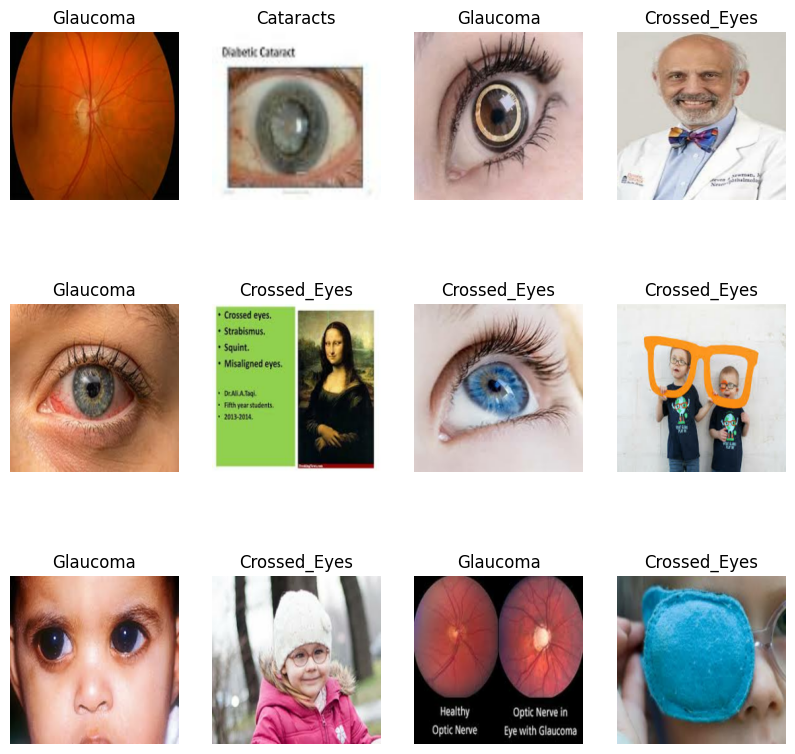

In [12]:

##visualzing

plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [13]:

len(dataset)



12

In [14]:
train_size = 0.8
len(dataset)*train_size

9.600000000000001

In [15]:
##function to split dataset


def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [16]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [18]:

len(train_ds)

9

In [19]:
len(test_ds)

2

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

Building model-----adding layers


In [23]:
### Creating a Layer for Resizing and Normalization

resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [24]:
### Data Augmentation

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [25]:

##apply augmentation to train ds


train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [28]:


import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2

In [30]:
# Creating MobileNetV2 base model
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes=5
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)


9406464/9406464 [==============================] - 1s 0us/step


In [31]:
for layer in base_model.layers:
    layer.trainable = False

In [32]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 128, 128, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 128, 128, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 128, 128, 32)         0         ['bn_Conv1[

In [33]:

# Build the model
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))  # 5 classes for the five types of eye diseases

In [42]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Flatten,Dense


X = Flatten()(base_model.output)
X = Dense(units=1, activation='sigmoid')(X)

In [43]:
model = Model(base_model.input, X)


In [44]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 128, 128, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 128, 128, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 128, 128, 32)         0         ['bn_Conv1[0][0]']      

In [45]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [46]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=30,
)

Epoch 1/30
9/9 [==============================] - 43s 5s/step - loss: 0.0000e+00 - accuracy: 0.1115 - val_loss: 0.0000e+00 - val_accuracy: 0.0625
Epoch 2/30
9/9 [==============================] - 20s 2s/step - loss: 0.0000e+00 - accuracy: 0.1115 - val_loss: 0.0000e+00 - val_accuracy: 0.0625
Epoch 3/30
9/9 [==============================] - 19s 2s/step - loss: 0.0000e+00 - accuracy: 0.1115 - val_loss: 0.0000e+00 - val_accuracy: 0.0625
Epoch 4/30
9/9 [==============================] - 18s 2s/step - loss: 0.0000e+00 - accuracy: 0.1115 - val_loss: 0.0000e+00 - val_accuracy: 0.0625
Epoch 5/30
9/9 [==============================] - 20s 2s/step - loss: 0.0000e+00 - accuracy: 0.1115 - val_loss: 0.0000e+00 - val_accuracy: 0.0625
Epoch 6/30
9/9 [==============================] - 19s 2s/step - loss: 0.0000e+00 - accuracy: 0.1115 - val_loss: 0.0000e+00 - val_accuracy: 0.0625
Epoch 7/30
9/9 [==============================] - 21s 2s/step - loss: 0.0000e+00 - accuracy: 0.1115 - val_loss: 0.0000e+00 -

In [47]:
scores = model.evaluate(test_ds)

2/2 [==============================] - 5s 2s/step - loss: 0.0000e+00 - accuracy: 0.1094


In [48]:
history

In [49]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 9}

In [50]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

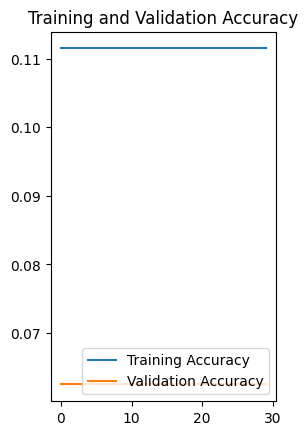

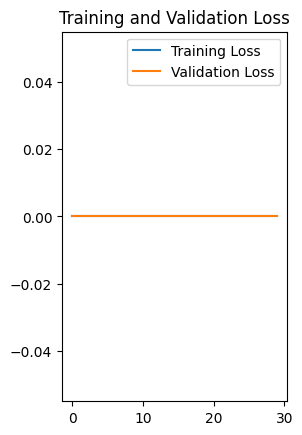

In [57]:

# Ensure that acc, val_acc, loss, and val_loss have the same length
num_epochs = len(acc)

# Plotting
plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), acc, label='Training Accuracy')
plt.plot(range(num_epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), loss, label='Training Loss')
plt.plot(range(num_epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


first image to predict
actual label: Glaucoma
1/1 [==============================] - 2s 2s/step
predicted label: Bulging_Eyes


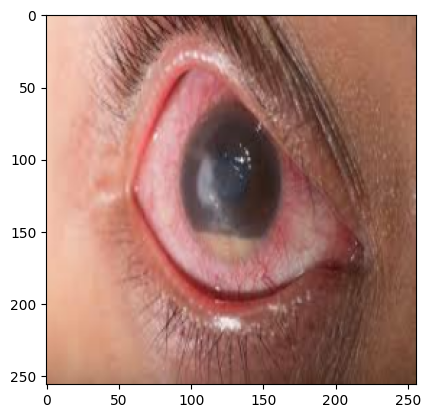

In [82]:

import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [80]:
###function for inference

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 81ms/step


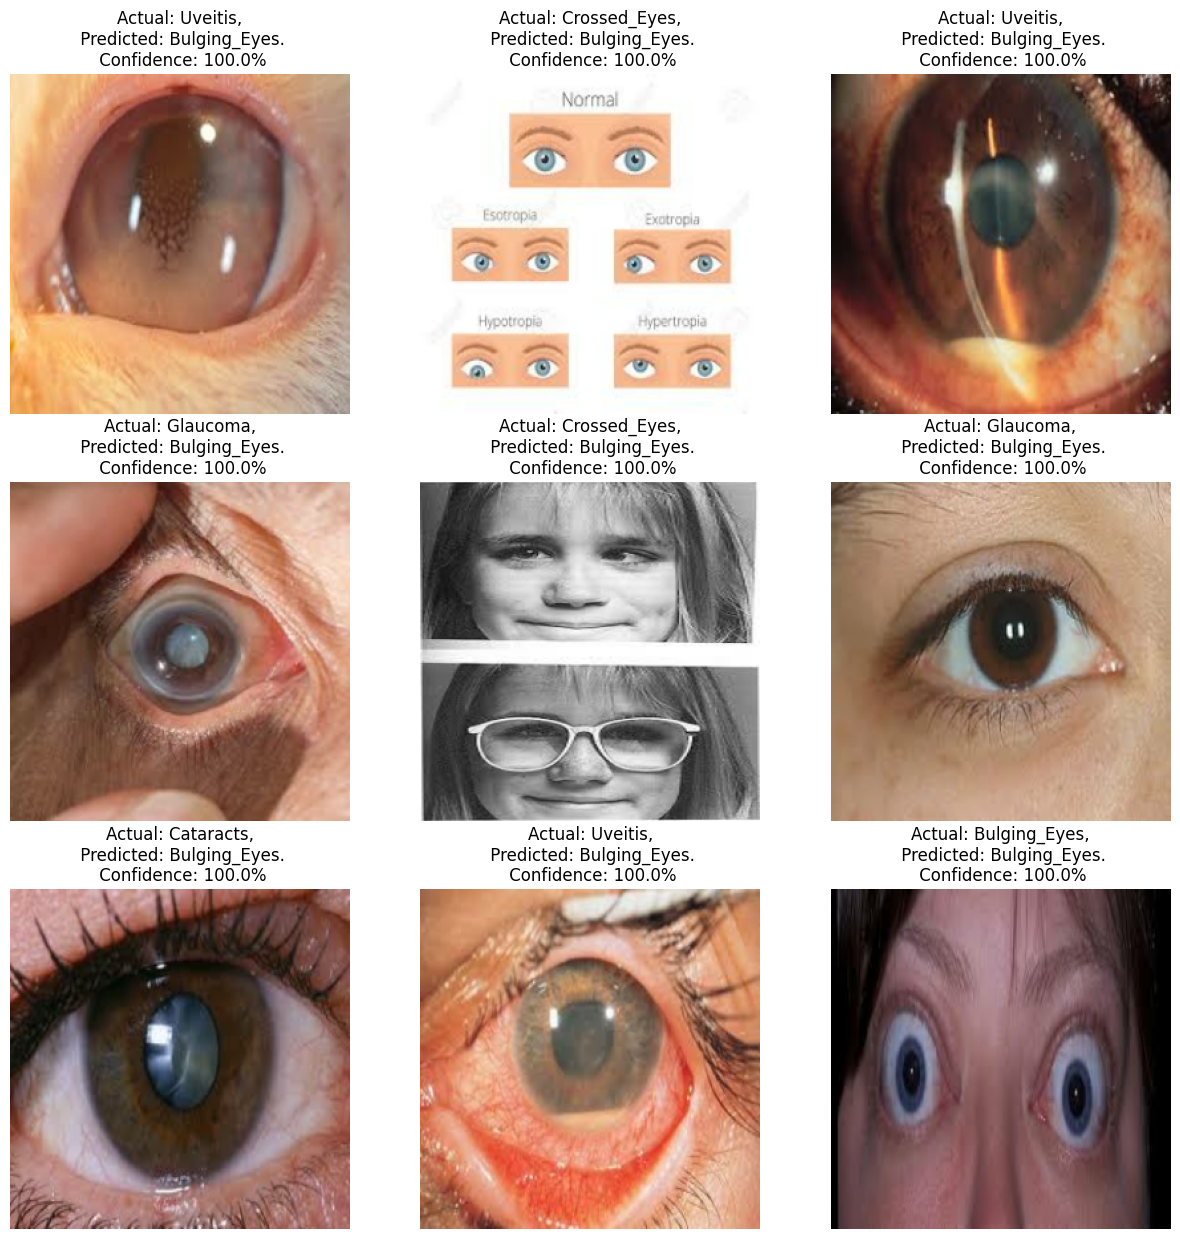

In [81]:
##running inference for few sample images

plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [71]:
import os
from pathlib import Path



base_directory = "/content/Eye_diseases"

# Create the directory if it doesn't exist
if not os.path.exists(base_directory):
    raise FileNotFoundError(f"The directory {base_directory} does not exist.")

# Iterate through subdirectories in the base directory
for disease_folder in os.listdir(base_directory):
    disease_folder_path = os.path.join(base_directory, disease_folder)

    if os.path.isdir(disease_folder_path):
        # For each disease folder, find the latest version
        model_directory = os.path.join(disease_folder_path, "models")

        # Create the directory if it doesn't exist
        Path(model_directory).mkdir(parents=True, exist_ok=True)

        model_version = max([int(i) for i in os.listdir(model_directory) + ['0']]) + 1

        # Save the model with the next version number
        model.save(f"{model_directory}/{model_version}")


In [73]:

import os
from pathlib import Path

# Assuming you have loaded or trained your model and stored it in the 'model' variable
# Replace 'path/to/your/model.h5' with the actual path to your trained model file

# Specify the base directory path
base_directory = "/content/Eye_diseases"

# Create the directory if it doesn't exist
if not os.path.exists(base_directory):
    raise FileNotFoundError(f"The directory {base_directory} does not exist.")

# Iterate through subdirectories in the base directory
for disease_folder in os.listdir(base_directory):
    disease_folder_path = os.path.join(base_directory, disease_folder)

    if os.path.isdir(disease_folder_path):
        # For each disease folder, find the latest version
        model_directory = os.path.join(disease_folder_path, "models")

        # Create the directory if it doesn't exist
        Path(model_directory).mkdir(parents=True, exist_ok=True)

        model_version = max([int(i) for i in os.listdir(model_directory) + ['0']]) + 1

        # Create the filename before saving
        model_filename = f"{model_directory}/{model_version}"

        # Save the model with the next version number
        try:
            model.save(model_filename)
            print(f"Model saved successfully as: {model_filename}")
        except Exception as e:
            print(f"Error saving the model: {e}")


Model saved successfully as: /content/Eye_diseases/Cataracts/models/2
Model saved successfully as: /content/Eye_diseases/Crossed_Eyes/models/2
Model saved successfully as: /content/Eye_diseases/Uveitis/models/2
Model saved successfully as: /content/Eye_diseases/Bulging_Eyes/models/2
Model saved successfully as: /content/Eye_diseases/Glaucoma/models/2


In [76]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

def predict_eye_disease(image_path, base_directory="/content/Eye_diseases"):
    # Extract the disease category from the image path
    disease_category = image_path.split(os.path.sep)[-2]

    # Load the appropriate model based on the disease category
    model_directory = os.path.join(base_directory, disease_category, "models")
    latest_model_version = max([int(i) for i in os.listdir(model_directory) + ['0']])
    model_filename = f"{model_directory}/{latest_model_version}"

    # Load the model
    loaded_model = load_model(model_filename)

    # Load and preprocess the input image
    target_size = (256, 256)  # Adjust based on your model's input size
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the pixel values to the range [0, 1]

    # Make the prediction
    predictions = loaded_model.predict(img_array)
    predicted_class = np.argmax(predictions)
    probability = predictions[0][predicted_class]

    # Mapping the predicted class index to the actual class label (adjust as needed)
    class_labels = {0: 'Bulging eyes', 1: 'Cataracts', 2: 'Crossed eyes', 3: 'Glaucoma', 4: 'Uveitis'}
    predicted_disease = class_labels[predicted_class]

    return predicted_disease, probability


image_path_to_predict = "/content/Eye_diseases/Bulging_Eyes/image-7.jpeg"
predicted_disease, confidence = predict_eye_disease(image_path_to_predict)

print(f"Predicted Eye Disease: {predicted_disease}")
print(f"Confidence: {confidence:.2%}")


1/1 [==============================] - 1s 1s/step
Predicted Eye Disease: Bulging eyes
Confidence: 100.00%
